# Purchase Prediction

The following project implements Naive Bayes and Decision Tree Classifier to predict if a person will purchase a given product based on the attributes present in the original dataset which are Age,Salary.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importing the dataset
dataset = pd.read_csv('dataset.csv')
display(dataset.head())

X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values
print('-'*80)
print(f'Shape of X is {X.shape}\nShape of y is {y.shape}')

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('-'*80)
print(f"Lenght of X_train: {len(X_train)}\nLenght of X_test: {len(X_test)}")
print(f"Lenght of y_train: {len(y_train)}\nLenght of y_test: {len(y_test)}")

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


--------------------------------------------------------------------------------
Shape of X is (400, 2)
Shape of y is (400,)
--------------------------------------------------------------------------------
Lenght of X_train: 320
Lenght of X_test: 80
Lenght of y_train: 320
Lenght of y_test: 80


In [2]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
for i in range(10):
  print(X_train[i])
print('-'*80)
for i in range(10):
  print(X_test[i])

[1.92295008 2.14601566]
[2.02016082 0.3787193 ]
[-1.3822153 -0.4324987]
[-1.18779381 -1.01194013]
[ 1.92295008 -0.92502392]
[0.36757813 0.29180308]
[0.17315664 0.14694273]
[2.02016082 1.74040666]
[ 0.75642112 -0.83810771]
[ 0.27036739 -0.28763835]
--------------------------------------------------------------------------------
[-0.79895082  0.49460758]
[-0.02126485 -0.57735906]
[-0.31289709  0.14694273]
[-0.79895082  0.26283101]
[-0.31289709 -0.57735906]
[-1.09058306 -1.44652121]
[-0.70174008 -1.59138156]
[-0.21568634  2.14601566]
[-1.96547978 -0.05586178]
[ 0.85363187 -0.78016356]


# 1. Decision Tree Classifier

DecisionTreeClassifier()

--------------------Accuracy Score on the Test set--------------------
90%

--------------------Precision Score on the Test set--------------------
72%

--------------------Displaying entropy--------------------
[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1]


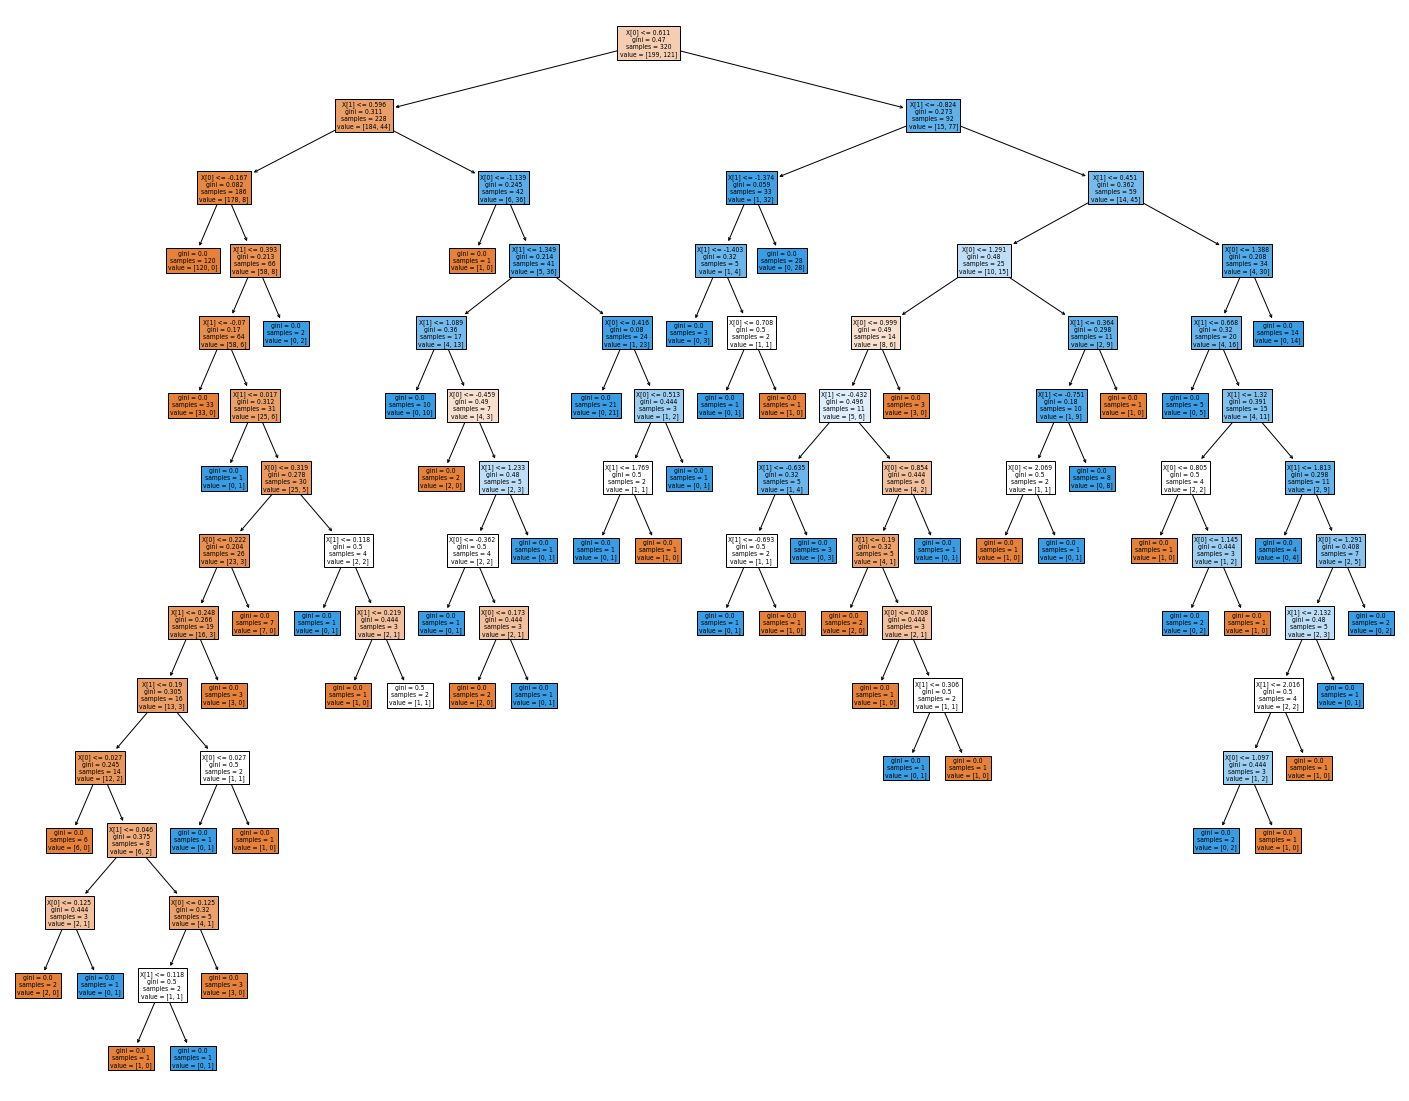

In [3]:
# Fitting Decision Tree classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
print(classifier)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#print(y_pred)

#Displaying the Decision Tree
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,filled=True)

# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_pred)))

#Precision score
from sklearn.metrics import average_precision_score
print('\n'+'-'*20+'Precision Score on the Test set'+'-'*20) 
average_precision=average_precision_score(y_test,y_pred)
print("{:.0%}".format(average_precision))
#print(average_precision)

#Entopy calcalation
print('\n'+'-'*20+'Displaying entropy'+'-'*20) 
classifier_entropy=DecisionTreeClassifier(criterion="entropy")
classifier_entropy.fit(X_train,y_train)
output2=classifier_entropy.predict(X_test)
print(output2)



To save the above decision tree execute the following cell

In [ ]:
fig.savefig("decistion_tree.png")

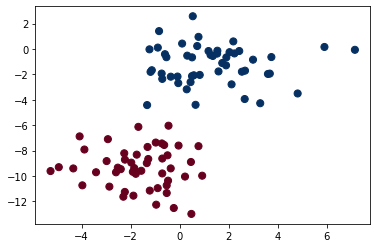

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

# 2.Naive Bayes (Gaussian Naive Bayes).

In [5]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
print(classifier)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#ptinting the predicted test set
print(y_pred)
#printing the test sample
print('\n'+'-'*20+'The actual Test set'+'-'*20)
print(y_test)
# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('\n'+'-'*20+'Accuracy Score on the Test set'+'-'*20)                             
print("{:.0%}".format(accuracy_score(y_test,y_pred)))

#Precision score
from sklearn.metrics import average_precision_score
print('\n'+'-'*20+'Precision Score on the Test set'+'-'*20) 
average_precision=average_precision_score(y_test,y_pred)
print("{:.0%}".format(average_precision))

# Printing Confusion matrix
print('\n'+'-'*20+'Confusion Matrix'+'-'*20) 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)


GaussianNB()
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1]

--------------------The actual Test set--------------------
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]

--------------------Accuracy Score on the Test set--------------------
91%

--------------------Precision Score on the Test set--------------------
75%

--------------------Confusion Matrix--------------------
[[55  3]
 [ 4 18]]


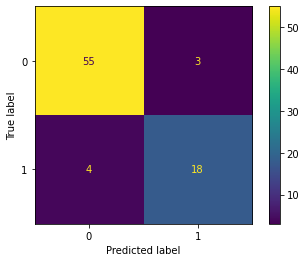

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()  

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80

